# Import Modules and Files

In [1]:
#!pip install pandas numpy matplotlib folium seaborn geopy scikit-learn

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import random
random.seed(42)
from folium.plugins import HeatMap
from IPython.display import display, Image
from datetime import datetime, timedelta
from geopy.distance import geodesic
from sklearn.cluster import DBSCAN
from folium.plugins import HeatMap
from PIL import Image

In [163]:
url = "https://gps-london.s3.eu-west-2.amazonaws.com/gps.csv"
df = pd.read_csv(url)
# or pd.read_csv("gps.csv")

In [164]:
df

,user_id,datetime,lat,lon
0,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:49:29+00:00,51.504017,-0.086455
1,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:52:01+00:00,51.505192,-0.090741
2,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:52:32+00:00,51.504098,-0.095321
3,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:55:55+00:00,51.504084,-0.109144
4,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:58:01+00:00,51.504191,-0.113367
...,...,...,...,...
1770006,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:31:19+00:00,51.504983,-0.116347
1770007,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:32:21+00:00,51.504162,-0.108317
1770008,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:34:29+00:00,51.504318,-0.107971
1770009,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:35:34+00:00,51.503990,-0.099953


# General Information

In [165]:
# Basic Information 
print("Basic Information from this Data:\n")
print(df.info())

Basic Information from this Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770011 entries, 0 to 1770010
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   object 
 1   datetime  object 
 2   lat       float64
 3   lon       float64
dtypes: float64(2), object(2)
memory usage: 54.0+ MB
None


In [166]:
# Summary of the Data
print("Summary Statistics:\n")
print(df.describe())
df.isna().sum()

Summary Statistics:

                lat           lon
count  1.770011e+06  1.770011e+06
mean   5.149896e+01 -9.836186e-02
std    6.002999e-03  1.186196e-02
min    5.148249e+01 -1.213403e-01
25%    5.149463e+01 -1.088844e-01
50%    5.150077e+01 -9.862888e-02
75%    5.150407e+01 -8.793030e-02
max    5.150664e+01 -7.640790e-02


user_id     0
datetime    0
lat         0
lon         0
dtype: int64

In [167]:
# Count of Unique Users
print("Number of Unique Users:")
print(df['user_id'].nunique())

print("\nTotal number of rows:")
print(len(df))

Number of Unique Users:
31606

Total number of rows:
1770011


In [168]:
# Data Spread
print("Date Range:")
print("Start Date:", df['datetime'].min())
print("End Date:", df['datetime'].max())

print("\nFrequency of Data Entries:")
print(df['datetime'].value_counts().head())

print("\nFrequency of the user_id User:")
print(df['user_id'].value_counts().head())

print("\nGeographical Spread:")
print("Latitude Range:", df['lat'].min(), "to", df['lat'].max())
print("Longitude Range:", df['lon'].min(), "to", df['lon'].max())

Date Range:
Start Date: 2018-01-08 00:00:20+00:00
End Date: 2018-01-19 23:59:41+00:00

Frequency of Data Entries:
2018-01-19 08:44:03+00:00    20
2018-01-09 18:05:43+00:00    19
2018-01-10 08:39:51+00:00    19
2018-01-17 08:54:26+00:00    18
2018-01-09 08:32:35+00:00    18
Name: datetime, dtype: int64

Frequency of the user_id User:
435771D7-6329-4664-8C4A-C1366A1CDDB0    3430
1f1e1735-9e08-4981-b83f-6f910622f982    1670
57e5b56c-18bc-4f50-a66b-f9f625ea3b64    1391
2051c18f-d6a7-41f4-96bb-1659f2f8ef4f    1244
39fc7ed0-8f1b-43ee-9837-1a6ed1a011ff    1221
Name: user_id, dtype: int64

Geographical Spread:
Latitude Range: 51.4824890921471 to 51.5066431509811
Longitude Range: -0.121340251898886 to -0.0764078963103396


# Clean Data

In [169]:
# Convert datetime data type from object to datatime 
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the DataFrame by user_id and datetime
df.sort_values(by=['user_id', 'datetime'], inplace=True)

In [170]:
df

,user_id,datetime,lat,lon
4823,0001347E-B3AD-4B84-80B9-14312A5CDBF4,2018-01-12 13:33:17+00:00,51.495391,-0.115966
4824,0001347E-B3AD-4B84-80B9-14312A5CDBF4,2018-01-12 13:38:22+00:00,51.498572,-0.105938
4825,0001347E-B3AD-4B84-80B9-14312A5CDBF4,2018-01-12 13:43:24+00:00,51.499629,-0.096044
4826,0001347E-B3AD-4B84-80B9-14312A5CDBF4,2018-01-12 13:51:10+00:00,51.500191,-0.089147
4827,0001347E-B3AD-4B84-80B9-14312A5CDBF4,2018-01-12 13:56:47+00:00,51.500398,-0.080649
...,...,...,...,...
1763804,fffd15f4-bbd5-4bac-9d9f-a9568bb701fc,2018-01-19 16:42:31+00:00,51.506551,-0.095215
1763805,fffd15f4-bbd5-4bac-9d9f-a9568bb701fc,2018-01-19 21:23:26+00:00,51.495697,-0.078181
1763806,fffd15f4-bbd5-4bac-9d9f-a9568bb701fc,2018-01-19 21:25:36+00:00,51.495714,-0.078180
1763807,fffd15f4-bbd5-4bac-9d9f-a9568bb701fc,2018-01-19 21:33:09+00:00,51.495714,-0.078178


# Estimate individual dwells from the GPS data.

I have created two functions to filter the entire dataset. The filtered data will include only those records where the duration of staying in the same place is at least 30 minutes, with a distance threshold of 50. This approach allows us to identify active dwelling locations.

In [171]:
# The data is big, so I decided to define several parameters for batch processing first
chunk_size = 10000
dwells_list = []

In [172]:
# Function to calculate distance between two points
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).meters # Use geodesic

In [173]:
# Function to identify dwells
# This function identifies locations where users have stayed for a significant amount of time (dwell locations) 
# based on proximity and duration thresholds.
# Set minimal time duration to be considered dwells and distance threshold 
def identify_dwells(df, min_duration_minutes=45, distance_threshold=30): 
    
    # List to hold the dwell data
    dwells = []

    # Iterate over the DataFrame by user_id
    for user_id, user_df in df.groupby('user_id'):
        potential_dwell_start = None
        last_point = None

        for i, row in user_df.iterrows():
            current_point = (row['lat'], row['lon'])
            current_time = row['datetime']

            if last_point is not None:
                # Calculate the distance from the last point
                distance = calculate_distance(*last_point, *current_point)

                if distance <= distance_threshold:
                    if potential_dwell_start is None:
                        # Start a new potential dwell
                        potential_dwell_start = last_time
                else:
                    if potential_dwell_start is not None:
                        # Check if the potential dwell meets the minimum duration criteria
                        if (current_time - potential_dwell_start).total_seconds() / 60.0 >= min_duration_minutes:
                            # Record the dwell
                            dwells.append({
                                'user_id': user_id,
                                'start_time': potential_dwell_start,
                                'end_time': current_time,
                                'lat': last_point[0],
                                'lon': last_point[1]
                            })
                        # Reset potential_dwell_start since the user moved beyond the threshold
                        potential_dwell_start = None

            # Update the last point and time
            last_point = current_point
            last_time = current_time

    # Create a DataFrame from the dwells list
    dwells_df = pd.DataFrame(dwells)
    return dwells_df

Batch processing is suitable for handling large volumes of data, as it minimizes memory usage.

In [174]:
# Iterate over chunks of the DataFrame
for chunk_start in range(0, len(df), chunk_size):
    chunk_end = min(chunk_start + chunk_size, len(df))
    chunk = df.iloc[chunk_start:chunk_end]  # Get a chunk of the DataFrame
    
    # Identify dwells for the current chunk
    dwells_chunk = identify_dwells(chunk)
    dwells_list.append(dwells_chunk)

# Concatenate the list of dwells chunks into a single DataFrame
dwells = pd.concat(dwells_list).reset_index(drop=True)

# Show the resulting DataFrame
dwells

,user_id,start_time,end_time,lat,lon
0,0006AACD-AB48-46A6-BC0C-8496A903DCD9,2018-01-12 15:02:32+00:00,2018-01-12 15:57:19+00:00,51.497524,-0.080989
1,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-12 11:05:28+00:00,2018-01-17 14:01:35+00:00,51.487643,-0.111270
2,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-17 14:31:21+00:00,2018-01-17 22:34:06+00:00,51.506172,-0.117457
3,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-17 22:56:58+00:00,2018-01-18 12:40:44+00:00,51.487665,-0.111216
4,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-18 13:27:01+00:00,2018-01-18 14:29:16+00:00,51.487682,-0.111060
...,...,...,...,...,...
43094,ffaf6e65-0610-4f28-8acf-a0d9b2816511,2018-01-16 19:39:57+00:00,2018-01-17 19:53:52+00:00,51.502309,-0.101080
43095,ffed1702-1a50-4760-a6a9-f9f43f7b2b52,2018-01-08 09:56:23+00:00,2018-01-12 10:15:53+00:00,51.485985,-0.120644
43096,ffed1702-1a50-4760-a6a9-f9f43f7b2b52,2018-01-12 10:15:53+00:00,2018-01-18 07:25:22+00:00,51.486268,-0.120735
43097,fffd15f4-bbd5-4bac-9d9f-a9568bb701fc,2018-01-19 07:18:14+00:00,2018-01-19 08:59:29+00:00,51.495754,-0.078319


In [183]:
# dwells.to_csv('filtered_df.csv', index=False) 
# This is to make the file easy to import later
# The file is already imported

# Further Analysis based on the filtered dwells

## Map Plotting

In [184]:
dwells = pd.read_csv('filtered_df.csv')

In [ ]:
dwells_backup = dwells.copy()
dwells_backup

In [185]:
dwells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43099 entries, 0 to 43098
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     43099 non-null  object 
 1   start_time  43099 non-null  object 
 2   end_time    43099 non-null  object 
 3   lat         43099 non-null  float64
 4   lon         43099 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.6+ MB


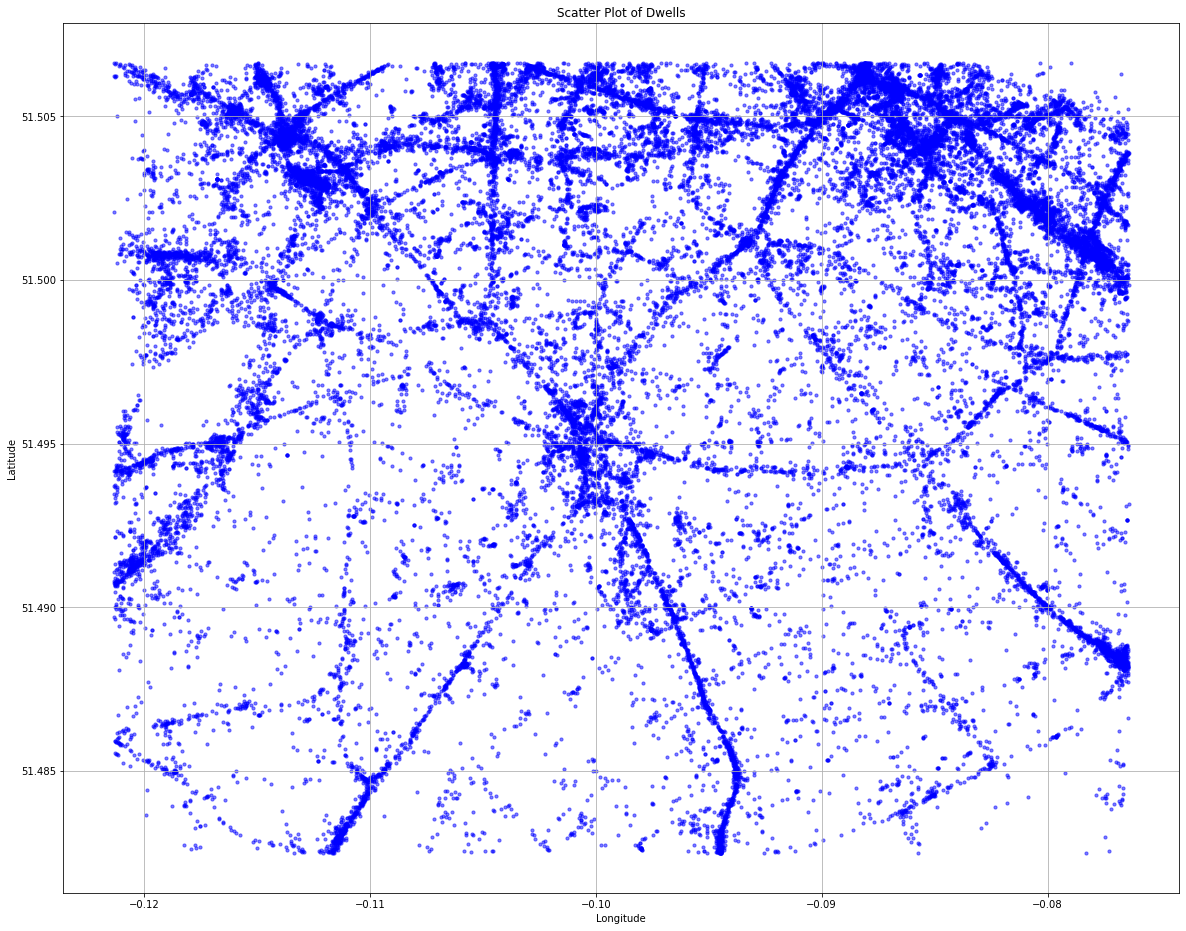

In [186]:
plt.figure(figsize=(20, 16))
plt.scatter(dwells['lon'], dwells['lat'], alpha=0.5, c='blue', s=10)
plt.title('Scatter Plot of Dwells')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

This pattern suggests that the data points (dwells) are concentrated along the roads and intersections where people are likely to stop or stay for a period of time, such as traffic lights, bus stops, or areas of commercial activity.

In [187]:
mean_lat = dwells['lat'].mean()
mean_lon = dwells['lon'].mean()

# Define the map center using the mean coordinates
map_center = [mean_lat, mean_lon]

# Create a new map centered around the mean coordinates
m = folium.Map(location=map_center, zoom_start=12)

# Add the dwell points to the map as a heat map
HeatMap(data=dwells[['lat', 'lon']].values, radius=10).add_to(m)

# Save the map to an HTML file again
heatmap_path = 'dwell_locations_heatmap.html'
m.save(heatmap_path)

heatmap_path

'dwell_locations_heatmap.html'

I decided to import the result to heatmap to see it in a real map. This way, I can see where the dwells more clearly. 
The Html can also be opened directly to see it in more detail, this picture is only for demonstration.

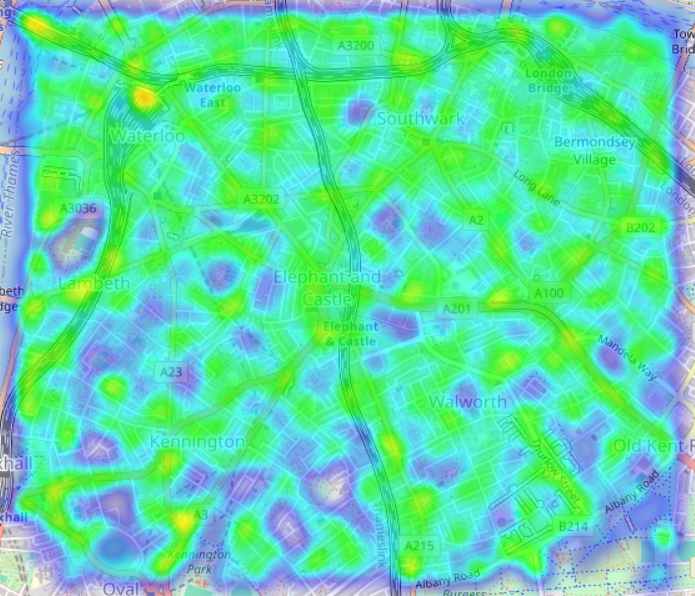

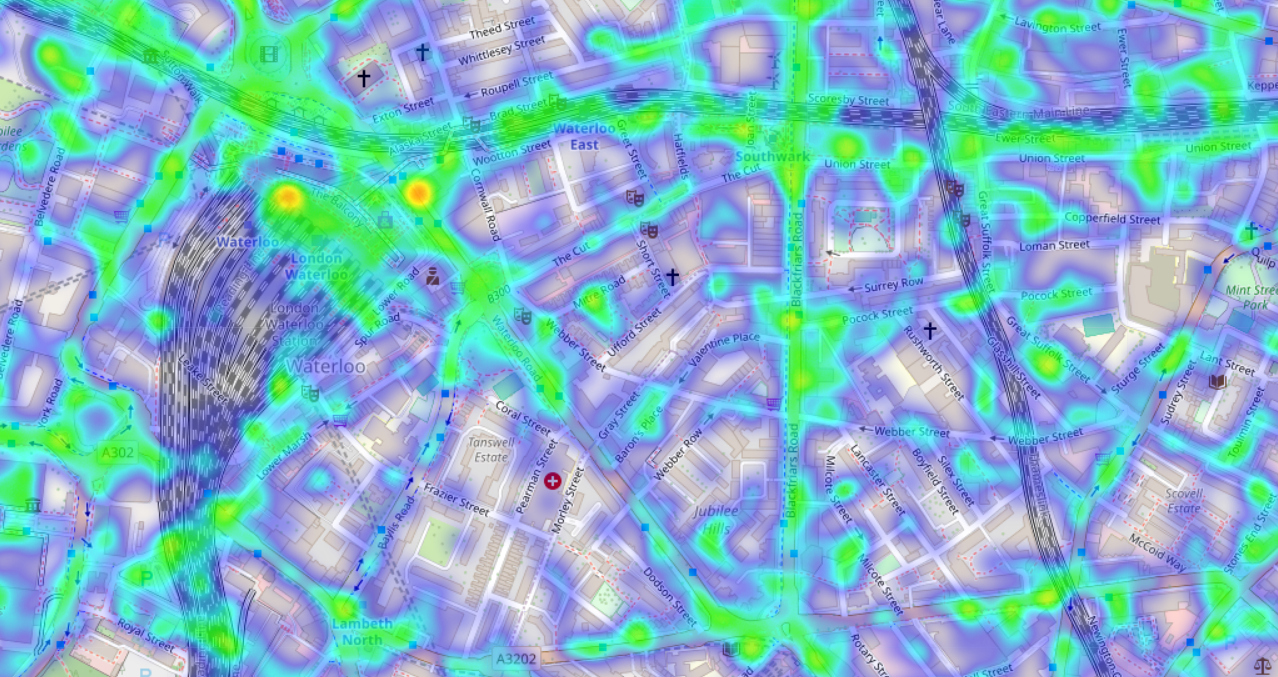

In [16]:
# Load the image for display
image_path = 'Map Dwells_Final.png'
img = Image.open(image_path)

image_path2 = 'Map Dwells_Final2.png'
img2 = Image.open(image_path2)

# Display the image
display(img)
display(img2)

Cool colors (green, blue): These represent areas with fewer dwell points. The cooler the color, the lower the density of dwells in that area.

Warm colors (yellow, orange, red): These indicate areas with a higher density of dwell points. The warmer the color, the higher the concentration of dwells.

Hot colors (red, purple, white): The hottest colors typically represent the highest density areas, which can be considered hotspots. These are areas where a significant amount of time is spent by users, indicating potential high activity or popular locations.

In [188]:
# Extract hour and day of week from the start time
dwells['start_time'] = pd.to_datetime(dwells['start_time'])
dwells['end_time'] = pd.to_datetime(dwells['end_time'])

dwells['start_hour'] = dwells['start_time'].dt.hour
dwells['day_of_week'] = dwells['start_time'].dt.day_name()

In [189]:
dwells

,user_id,start_time,end_time,lat,lon,start_hour,day_of_week
0,0006AACD-AB48-46A6-BC0C-8496A903DCD9,2018-01-12 15:02:32+00:00,2018-01-12 15:57:19+00:00,51.497524,-0.080989,15,Friday
1,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-12 11:05:28+00:00,2018-01-17 14:01:35+00:00,51.487643,-0.111270,11,Friday
2,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-17 14:31:21+00:00,2018-01-17 22:34:06+00:00,51.506172,-0.117457,14,Wednesday
3,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-17 22:56:58+00:00,2018-01-18 12:40:44+00:00,51.487665,-0.111216,22,Wednesday
4,0007744c-5c2a-472a-8de5-aabe90ec9fe5,2018-01-18 13:27:01+00:00,2018-01-18 14:29:16+00:00,51.487682,-0.111060,13,Thursday
...,...,...,...,...,...,...,...
43094,ffaf6e65-0610-4f28-8acf-a0d9b2816511,2018-01-16 19:39:57+00:00,2018-01-17 19:53:52+00:00,51.502309,-0.101080,19,Tuesday
43095,ffed1702-1a50-4760-a6a9-f9f43f7b2b52,2018-01-08 09:56:23+00:00,2018-01-12 10:15:53+00:00,51.485985,-0.120644,9,Monday
43096,ffed1702-1a50-4760-a6a9-f9f43f7b2b52,2018-01-12 10:15:53+00:00,2018-01-18 07:25:22+00:00,51.486268,-0.120735,10,Friday
43097,fffd15f4-bbd5-4bac-9d9f-a9568bb701fc,2018-01-19 07:18:14+00:00,2018-01-19 08:59:29+00:00,51.495754,-0.078319,7,Friday


## Activity Analysis

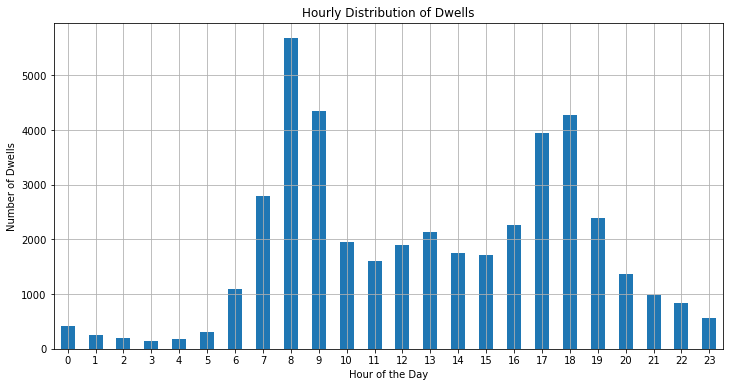

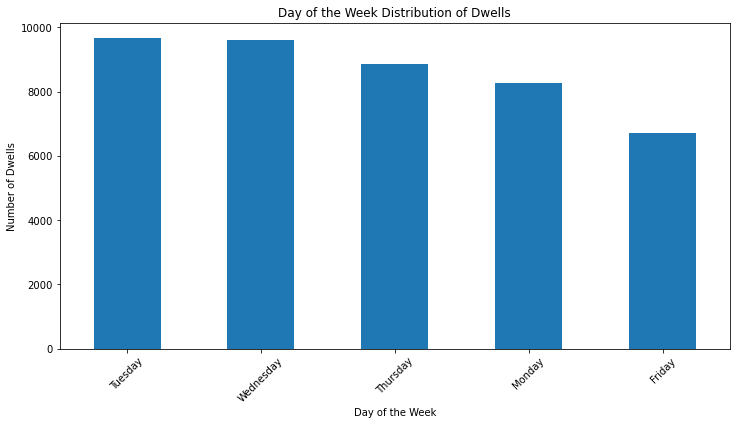

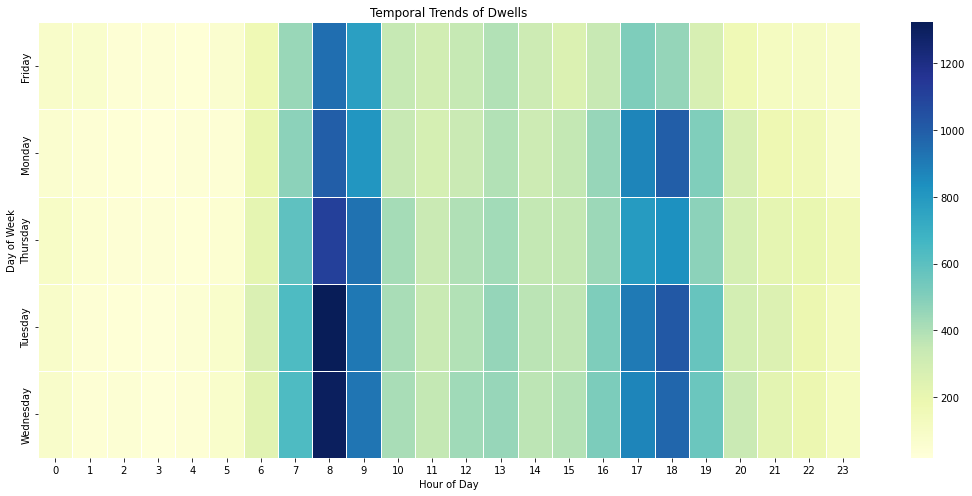

In [190]:
# Hourly distribution of dwells
hourly_dwell_distribution = dwells['start_hour'].value_counts().sort_index()

# Day of the week distribution of dwells
day_of_week_dwell_distribution = dwells['day_of_week'].value_counts()


# Plot hourly distribution
plt.figure(figsize=(12, 6))
hourly_dwell_distribution.plot(kind='bar')
plt.title('Hourly Distribution of Dwells')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dwells')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot day of the week distribution
plt.figure(figsize=(12, 6))
day_of_week_dwell_distribution.plot(kind='bar')
plt.title('Day of the Week Distribution of Dwells')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Dwells')
plt.xticks(rotation=45)
plt.show()

# Combination
dwells['day_of_week'] = dwells['start_time'].dt.day_name()
dwells['hour_of_day'] = dwells['start_time'].dt.hour

# Create a pivot table to count the number of dwells for each combination of day and hour
temporal_trends = dwells.pivot_table(index='day_of_week', columns='hour_of_day', aggfunc='size', fill_value=0)

# Plotting the temporal trends as a heatmap for better visualization
plt.figure(figsize=(15, 7))
sns.heatmap(temporal_trends, cmap='YlGnBu', linewidths=.5, annot=False)  # annot=True can be set for small datasets
plt.title('Temporal Trends of Dwells')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# User Activity Analysis

In [191]:
# Identify high-activity users
# Count the number of dwells per user
user_activity = dwells['user_id'].value_counts()

# Convert the Series to a DataFrame
user_activity_df = pd.DataFrame({'user_id': user_activity.index, 'dwells count': user_activity.values})

# Print the DataFrame
user_activity_df.head(20)

,user_id,dwells count
0,DEF1AC85-350F-4C8A-872F-8BE67ED30D73,53
1,BB03FFB0-B6BA-44CE-B382-B4CDF944ACEC,39
2,61D56F4C-5F18-473E-A0A8-160C6FDFBD3E,33
3,308B68F1-137B-4A47-9EC2-9F3BEBC94D7F,31
4,CA08BCB6-DA9C-4C47-A24B-54C9E1562455,31
5,AEEF074C-E974-4918-8724-F1059153FC97,30
6,57e5b56c-18bc-4f50-a66b-f9f625ea3b64,29
7,21b6858f-3438-4052-8cb5-131fd7833442,29
8,E112CB96-32DC-4A86-89E3-E17D7B708344,28
9,784616B6-9F69-422C-8221-51E6D3698FCD,28


These values represent the number of times they were recorded as dwelling in a location. This frequency can be used to identify users with high activity within the areas. These users might be of particular interest for network usage studies, targeted marketing campaigns, or other customer engagement strategies. The users characteristic can also be used as a benchmark about how the potential candidate to be a target market.

## Average dwells of all users

In [192]:
# Calculate the duration of each dwell in minutes
dwells['dwell_duration'] = (dwells['end_time'] - dwells['start_time']).dt.total_seconds() / 60

# Calculate the average dwell time
average_dwell_time = dwells['dwell_duration'].mean()

print("Average Dwell Time:", average_dwell_time, "minutes")
print("Average Dwell Time:", average_dwell_time / 60 , "hour")

Average Dwell Time: 1502.0837266139206 minutes
Average Dwell Time: 25.034728776898678 hour


In [177]:
# Calculate the median dwell time
mode_dwell_time = dwells['dwell_duration'].mode()
mode_dwell_time_value = mode_dwell_time.iloc[0]  # Extract the mode value
print("Mode Dwell Time:", mode_dwell_time_value, "minutes")


Mode Dwell Time: 51.93333333333333 minutes
